##Roop_v1.3.2 极速版

---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Van-wise/roop-colab/blob/main/roop_v1_3_ipynb.ipynb)
[![Visitors](https://api.visitorbadge.io/api/visitors?path=https%3A%2F%2Fcolab.research.google.com%2Fgithub%2FVan-wise%2Froop-colab%2Fblob%2Fmain%2Froop_v1_3_ipynb.ipynb&labelColor=%232ccce4&countColor=%23555555&style=flat&labelStyle=upper)](https://visitorbadge.io/status?path=https%3A%2F%2Fcolab.research.google.com%2Fgithub%2FVan-wise%2Froop-colab%2Fblob%2Fmain%2Froop_v1_3_ipynb.ipynb)

---


<font color="red">**项目地址**：https://github.com/Van-wise/roop-colab

**如果遇到报错,请联系up：**
[bilibili](https://space.bilibili.com/1308057) or [issues](https://github.com/Van-wise/roop-colab/issues)

In [ ]:
#@title 1.克隆项目&下载模型&安装依赖

import os
import time
from IPython.utils import capture
from IPython.display import clear_output, display, HTML
import warnings
os.environ['PYTHONWARNINGS'] = 'ignore'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
!git config --global advice.detachedHead false
!sed -i 's@text = _formatwarnmsg(msg)@text =\"\"@g' {warnings.__file__}
warnings.filterwarnings("ignore")

手机端防掉线 = True # @param {"type":"boolean"}
链接谷歌云盘 = False # @param {"type":"boolean"}

os.chdir('/content/')
!git clone -q --depth 1 https://github.com/Van-wise/roop-colab.git roop
%run /content/roop/wise.py
clear_output()

content_models(链接谷歌云盘)
mobile_keepalive(手机端防掉线)


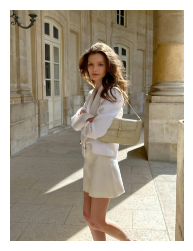

当前人脸素材路径为: /content/source/pexels-photo-28838757.jpg
当前视频素材路径为: /content/target/ol_fb9e648cf374235c2bf34a22ce2ba038.mp4
当前视频输出路径为: /content/output/pexels-photo-28838757.jpg_+_ol_fb9e648cf374235c2bf34a22ce2ba038.mp4


In [2]:
#@title 2.准备人脸素材

人脸素材 = "https://images.pexels.com/photos/28838757/pexels-photo-28838757.jpeg?auto=compress&cs=tinysrgb&w=600&lazy=load"  #@param {type:"string"}
视频素材 = "https://tsvideo.sacdnssedge.com/video/ol_fb9e648cf374235c2bf34a22ce2ba038.mp4"  #@param {type:"string"}
视频输出路径 = "/content/output" #@param {type:"string"}

预览人脸素材 = True # @param {"type":"boolean"}
预览视频素材 = True # @param {"type":"boolean"}

视频输出路径 = 视频输出路径.rstrip('/')
os.makedirs(视频输出路径, exist_ok=True)

source_path = display_media(人脸素材, 预览人脸素材, 1, 10)
target_path = display_media(视频素材, 预览视频素材, 2, 5)
output_path = None

if source_path is None:
    print("人脸素材路径为空。请检查输入或函数 'display_media'。")
elif target_path is None:
    print("视频素材路径为空。请检查输入或函数 'display_media'。")
else:
    source_name = source_path.split("/")[-1]
    target_name = target_path.split("/")[-1]
    combined_name = f'{source_name}_+_{target_name}'
    output_name = combined_name.replace('.mp4', '') + '.mp4'
    output_path = os.path.join(视频输出路径, output_name)

if source_path:
  print(f"当前人脸素材路径为: {source_path}")

if target_path:
  print(f"当前视频素材路径为: {target_path}")
if output_path:
  print(f"当前视频输出路径为: {output_path}")

In [3]:
#@title 3.开始换脸

os.chdir('/content/roop')

# --- 参数设置 ---

# 执行设备
# 可选值: cuda, cpu
# 默认值: cuda (推荐使用 GPU 加速)
# 说明: 选择执行代码的设备，如果你的机器有 NVIDIA GPU，建议选择 cuda 以获得更快的速度。
Device = "cuda"  # @param ["cuda", "cpu"]

# 帧处理器
# 可选值: "face_swapper face_enhancer", "face_swapper", "face_enhancer"
# 默认值: "face_swapper face_enhancer" (推荐使用人脸交换和增强)
# 说明: 选择要使用的帧处理器，可以同时使用多个处理器。
#        例如 "face_swapper face_enhancer" 表示同时进行人脸交换和人脸增强。
Processor = "face_swapper face_enhancer"  # @param ["face_swapper face_enhancer", "face_swapper","face_enhancer"]

# 视频编码器
# 可选值: 'libx264', 'libx265', 'libvpx-vp9', 'h264_nvenc', 'hevc_nvenc'
# 默认值: 'libx264' (推荐使用 libx264，兼容性较好)
# 说明: 选择用于输出视频的编码器，不同的编码器在压缩率、速度和兼容性方面有所差异。
VideoEncoder = "h264_nvenc"  # @param ['libx264', 'libx265', 'libvpx-vp9', 'h264_nvenc', 'hevc_nvenc']

# 输出视频质量
# 取值范围: 0-100
# 默认值: 35 (推荐值: 25-50，数值越大质量越高，文件越大)
# 说明: 设置输出视频的质量，数值越大质量越高，但文件也会越大。
VideoQuality = "40"  # @param {type:"string"}

# 用于帧提取的图像格式
# 可选值: "jpg", "png"
# 默认值: "jpg" (推荐使用 jpg，体积更小)
# 说明: 选择用于帧提取的图像格式，jpg 格式的图像体积更小，但可能会损失一些画质。
TempFormat = "jpg"  # @param ["jpg", "png"]

# 用于帧提取的图像质量
# 取值范围: 0-100
# 默认值: 0 (推荐值: 0-95，数值越大质量越高，文件越大)
# 说明: 设置用于帧提取的图像质量，数值越大质量越高，但文件也会越大。
TempQuality = "0"  # @param {type:"string"}

# 保持目标帧率
# 可选值: True, False
# 默认值: True (推荐保持目标帧率)
# 说明: 选择是否保持目标视频的帧率，如果选择 False，则输出视频的帧率可能会与目标视频不同。
KeepFPS = True  # @param {type:"boolean"}

# 跳过目标音频
# 可选值: True, False
# 默认值: False (默认保留音频)
# 说明: 选择是否跳过目标视频的音频，如果选择 True，则输出视频将没有音频。
SkipAudio = False  # @param {type:"boolean"}

# 保留临时帧
# 可选值: True, False
# 默认值: False (默认不保留临时帧)
# 说明: 选择是否保留处理过程中生成的临时帧，如果选择 True，则会在输出目录下生成一个名为 "temp" 的文件夹，用于存放临时帧。
KeepFrames = False  # @param {type:"boolean"}

# 处理每一张脸
# 可选值: True, False
# 默认值: False (默认只处理检测到的第一张人脸)
# 说明: 选择是否处理图像/视频中的每一张人脸，如果选择 True，则会对检测到的所有的人脸进行处理。
ManyFaces = False  # @param {type:"boolean"}

# 参考面部的位置
# 取值范围: 整数
# 默认值: 0 (默认使用检测到的第一张人脸)
# 说明: 设置参考面部的位置，用于多张人脸的情况，0 表示使用检测到的第一张人脸作为参考。
ReferenceFacePosition = 0  # @param {type:"integer"}

# 参考帧的编号
# 取值范围: 整数
# 默认值: 0 (默认使用第一帧)
# 说明: 设置参考帧的编号，用于从视频中提取参考面部，0 表示使用第一帧作为参考。
ReferenceFrameNumber = 0  # @param {type:"integer"}

# 用于识别的面部距离
# 取值范围: 0-1
# 默认值: 0.85 (推荐值: 0.8-0.9，数值越小，识别越严格)
# 说明: 设置用于识别的面部距离阈值，用于判断两张人脸是否相似，数值越小，识别越严格。
SimilarFaceDistance = 0.8  # @param {type:"number"}

# 最大 RAM 使用量
# 取值范围: 整数 (GB)
# 默认值: 8 (根据实际情况调整)
# 说明: 设置程序运行时允许使用的最大 RAM，单位为 GB，如果你的机器内存较小，可以适当降低此值。
MaxMemory = 8  # @param {type:"integer"}

# 可用的执行提供程序
# 可选值: "cpu", "cuda"
# 默认值: "cpu" (推荐使用 GPU 加速)
# 说明: 选择可用的执行提供程序，如果你的机器有 NVIDIA GPU，建议选择 cuda 以获得更快的速度。
ExecutionProvider = "cuda"  # @param ["cpu", "cuda"]

# 执行线程数
# 取值范围: 整数
# 默认值: 8 (根据 CPU 核心数调整)
# 说明: 设置程序运行时使用的线程数，可以根据你的 CPU 核心数进行调整，以获得最佳性能。
ExecutionThreads = 16  # @param {type:"integer"}

# --- 命令构建 ---

# 将布尔值参数转换为命令行参数形式
KeepFPS = "--keep-fps" if KeepFPS else ""
SkipAudio = "--skip-audio" if SkipAudio else ""
KeepFrames = "--keep-frames" if KeepFrames else ""
ManyFaces = "--many-faces" if ManyFaces else ""

# 构建最终命令
cmd = f"run.py --execution-provider {Device} -s {source_path} -t {target_path} -o {output_path}"
cmd += f" --frame-processor {Processor}"
cmd += f" --output-video-encoder {VideoEncoder}"
cmd += f" --output-video-quality {VideoQuality}"
cmd += f" {KeepFPS}"
cmd += f" {SkipAudio}"
cmd += f" {KeepFrames}"
cmd += f" {ManyFaces}"
cmd += f" --temp-frame-format {TempFormat}"
cmd += f" --temp-frame-quality {TempQuality}"
cmd += f" --reference-face-position {ReferenceFacePosition}"
cmd += f" --reference-frame-number {ReferenceFrameNumber}"
cmd += f" --similar-face-distance {SimilarFaceDistance}"
cmd += f" --max-memory {MaxMemory}"
cmd += f" --execution-provider {ExecutionProvider}"
cmd += f" --execution-threads {ExecutionThreads}"

print("最终执行的命令:")
print(cmd)

# --- 执行命令 ---
!python $cmd

from datetime import datetime
from pathlib import Path
import shutil

current_time = datetime.now()
date_folder = current_time.strftime('%Y.%m.%d')

if output_path:
    print(f"输出视频已保存到: {output_path}")

    destination_folder = Path('/content') / date_folder / Path(output_path).stem  # /content/24.12.3/outputname
    if not destination_folder.exists():
        destination_folder.mkdir(parents=True)

    shutil.copy(source_path, destination_folder / Path(source_path).name)
    shutil.copy(target_path, destination_folder / Path(target_path).name)
    shutil.copy(output_path, destination_folder / Path(output_path).name)


最终执行的命令:
run.py --execution-provider cuda -s /content/source/pexels-photo-28838757.jpg -t /content/target/ol_fb9e648cf374235c2bf34a22ce2ba038.mp4 -o /content/output/pexels-photo-28838757.jpg_+_ol_fb9e648cf374235c2bf34a22ce2ba038.mp4 --frame-processor face_swapper face_enhancer --output-video-encoder h264_nvenc --output-video-quality 40 --keep-fps    --temp-frame-format jpg --temp-frame-quality 0 --reference-face-position 0 --reference-frame-number 0 --similar-face-distance 0.8 --max-memory 8 --execution-provider cuda --execution-threads 16
2025-08-20 09:22:44.973885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755681764.991957    1588 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755681764.997436    1588 cuda_blas.cc:1407] Unable to re

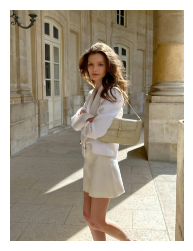

In [4]:
# @title 预览视频
只预览输出视频 = False # @param {"type":"boolean"}
if 只预览输出视频:
  display_media(output_path, True, 1, 9999)
else:
  source_path = display_media(人脸素材, 预览人脸素材, 1, 10)
  target_path = display_media(视频素材, 预览视频素材, 2, 5)
  display_media(output_path, True, 1, 9999)

In [12]:
# @title 保存文件
保存内容 = "保存全部内容" # @param ["保存当前内容","保存全部内容"]
保存到谷歌云盘 = True # @param {"type":"boolean"}
gdrive_roop_path = '/content/drive/MyDrive/roop_data/'
colab_roop_path = f'/content/{date_folder}/'

def handle_save_to_drive():
    if not os.path.exists(gdrive_roop_path):
        os.makedirs(gdrive_roop_path)
    content_models(True)

if output_path:
    if 保存内容 == "保存当前内容":
        if 保存到谷歌云盘:
            try:
                shutil.copytree(destination_folder, os.path.join(gdrive_roop_path, os.path.basename(destination_folder)))
                print(f"保存当前输出视频为：{destination_folder}")
            except FileExistsError:
                print("目标文件夹已存在。")
        else:
            print(f"保存当前输出视频为：{destination_folder}")
    elif 保存内容 == "保存全部内容":
        if 保存到谷歌云盘:
            handle_save_to_drive()
            !rsync -avz --ignore-existing {colab_roop_path} {gdrive_roop_path}
        else:
            print(f"保存当前输出视频为：{destination_folder}")

谷歌云盘已挂载...
sending incremental file list
./
pexels-photo-28838757.jpg_+_ol_fb9e648cf374235c2bf34a22ce2ba038/
pexels-photo-28838757.jpg_+_ol_fb9e648cf374235c2bf34a22ce2ba038/ol_fb9e648cf374235c2bf34a22ce2ba038.mp4
pexels-photo-28838757.jpg_+_ol_fb9e648cf374235c2bf34a22ce2ba038/pexels-photo-28838757.jpg
pexels-photo-28838757.jpg_+_ol_fb9e648cf374235c2bf34a22ce2ba038/pexels-photo-28838757.jpg_+_ol_fb9e648cf374235c2bf34a22ce2ba038.mp4

sent 9,714,757 bytes  received 84 bytes  19,429,682.00 bytes/sec
total size is 9,867,958  speedup is 1.02
